<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;">
    <h1 style='margin:15px 15px; color:#0000FF; font-size:40px'>Topic Modelling on BBC News Articles</h1>
</div>

Topic Modeling is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package. The challenge, however, is *how to extract good quality of topics that are clear, segregated and meaningful.* This depends heavily on the quality of text preprocessing and the strategy of finding the optimal number of topics. This tutorial attempts to tackle both of these problems.


[BBC](https://www.bbc.com/) stands for British Broadcasting Corporation.

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage.

The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

BBC News Online is the BBC's news website. It is one of the most popular news websites in the UK, reaching over a quarter of the UK's internet users, and worldwide, with around 14 million global readers every month.

The website contains international news coverage as well as articles based on entertainment, sport, science, and political news.

**Objective** : In this project the task is to identify major themes/topics across a collection of BBC news articles.



<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'> Content</h2>
</div>

1. Introduction
2. Prerequisites – Download nltk stopwords and spacy model
3. Import Packages
4. What does LDA do?
5. Prepare Stopwords
6. Import Newsgroups Data
7. Remove emails and newline characters
8. Tokenize words and Clean-up text
9. Creating Bigram and Trigram Models
10. Remove Stopwords, Make Bigrams and Lemmatize
11. Create the Dictionary and Corpus needed for Topic Modeling
12. Building the Topic Model
13. View the topics in LDA model
14. Compute Model Perplexity and Coherence Score
15. Visualize the topics-keywords
16. Building LDA Mallet Model
17. How to find the optimal number of topics for LDA?
18. Finding the dominant topic in each sentence
19. Find the most representative document for each topic
20. Topic distribution across documents

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'> Introduction</h2>
</div>

## **Importing Neccessary Modules**

Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model.

One of the primary applications of natural language processing is to automatically extract what topics people are discussing from large volumes of text. Some examples of large text could be feeds from social media, customer reviews of hotels, movies, etc, user feedbacks, news stories, e-mails of customer complaints etc.

Knowing what people are talking about and understanding their problems and opinions is highly valuable to businesses, administrators, political campaigns. And it’s really hard to manually read through such large volumes and compile the topics.

Thus is required an automated algorithm that can read through the text documents and automatically output the topics discussed.

In this tutorial, we will take a real example of the ’20 Newsgroups’ dataset and use LDA to extract the naturally discussed topics.

I will be using the Latent Dirichlet Allocation (LDA) from Gensim package along with the Mallet’s implementation (via Gensim). Mallet has an efficient implementation of the LDA. It is known to run faster and gives better topics segregation.

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Import Necessary Modules
</div>

The core packages used in this tutorial are `re`, `gensim`, `spacy` and `pyLDAvis`. Besides this we will also using `matplotlib`,`numpy` and `pandas` for data handling and visualization. Let’s import them.

In [ ]:
# pip install pyLDAvis
# pip install gensim
# pip install spacy==2.2.0

In [2]:
!pip install spacy

In [3]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
!pip install pyLDAvis
!pip install psutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.6 MB/s eta 0:00:00


In [5]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
# importing os module
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Prerequisites – Download nltk stopwords and spacy model</h2>
</div>

We will need the stopwords from NLTK and spacy’s en model for text pre-processing. Later, we will be using the spacy model for lemmatization.

Lemmatization is nothing but converting a word to its root word. For example: the lemma of the word ‘machines’ is ‘machine’. Likewise, ‘walking’ –> ‘walk’, ‘mice’ –> ‘mouse’ and so on.

In [7]:
# Run in python console
import nltk; nltk.download('stopwords')

# Run in terminal or command prompt
#python3 -m spacy download en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Prepare Stopwords</h2>
</div>

We have already downloaded the stopwords. Let's import them and make it available in `stop_words`.

In [8]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Data Gathering and Discovery (EDA)
</div>

Now we'll gather the data files and perform some basic operations to understand the data and how we can process it to improve the model performance. We will also apply some basic EDA to better understand the data.

In [9]:
# Define the directory containing your text files
#directory = 'data/bbc'

In [14]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/bbc/'

In [16]:
# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Initialize an empty list to store dictionaries
bbc = []

# Iterate over sub-directories to access the text files
for subdir in subdirs:
    # Address to the subdirectory
    dir_path = os.path.join(directory, subdir)

    # Check if the directory exists
    if not os.path.exists(dir_path):
        print(f"Directory {dir_path} does not exist.")
        continue

    # Iterate over all the text files present in a sub-directory
    for filename in os.listdir(dir_path):
        # Get file address
        filepath = os.path.join(dir_path, filename)

        # Traversing over text files and storing the articles into the dataframe
        try:
            with open(filepath, 'r') as file:
                data = file.read()

            # Escape characters to be ignored in the text
            escape = ['\n']

            # Removing escape characters from text
            for elem in escape:
                data = data.replace(elem, ' ')

            # Storing article to the list
            dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category': subdir}
            bbc.append(dict1)

        # Ignore exception, if any
        except Exception as e:
            print(f"Error processing file {filepath}: {e}")

### **Display the Dataframe**

In [17]:
# Convert the list of dictionaries to a DataFrame
bbc = pd.DataFrame(bbc)

# Display the DataFrame
bbc

,Filename,Contents,Category
0,289,uk economy facing 'major risks' the uk manufa...,business
1,011,ask jeeves tips online ad revival ask jeeves ...,business
2,402,us interest rate rise expected us interest ra...,business
3,081,bmw to recall faulty diesel cars bmw is to re...,business
4,363,"go-ahead for balkan oil pipeline albania, bul...",business
...,...,...,...
2220,062,ask jeeves joins web log market ask jeeves ha...,tech
2221,121,robots learn 'robotiquette' rules robots are ...,tech
2222,268,ibm frees 500 software patents computer giant...,tech
2223,343,ultra fast wi-fi nears completion ultra high ...,tech


**The dataset consists of the following attributes:**

●	Index: Entry index.

●	FileName: Destination File name/number.

●	Contents: Complete transcript of a article, this contains all the textual data present in the destination file for a particular entry.

●	Category: Theme/domain of a article.


Now, lets check if a particular article is being stored more than once into the dataframe. Having duplicates in our data would cause inconsistencies in results.

## **Category**

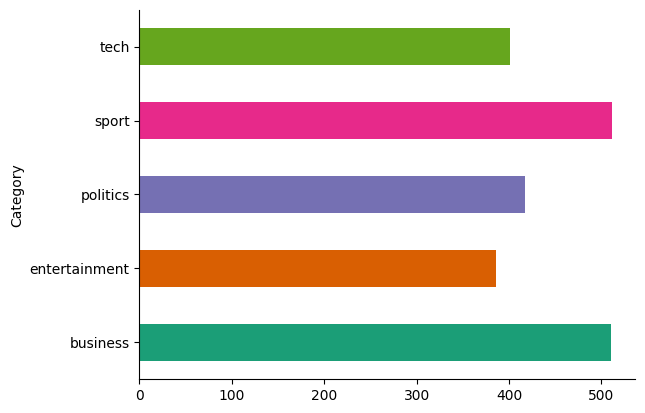

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
bbc.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Data Cleaning
</div>

In [19]:
bbc.shape

(2225, 3)

### **Checking for Duplicate Rows**

In [20]:
# Checking for duplicate rows
bbc[bbc.duplicated(subset = "Contents")]

,Filename,Contents,Category
32,256,singapore growth at 8.1% in 2004 singapore's ...,business
110,356,s korea spending boost to economy south korea...,business
267,265,troubled marsh under sec scrutiny the us stoc...,business
310,416,steady job growth continues in us the us crea...,business
351,214,economy 'strong' in election year uk business...,business
...,...,...,...
2206,036,microsoft seeking spyware trojan microsoft is...,tech
2209,376,t-mobile bets on 'pocket office' t-mobile has...,tech
2214,066,kenyan school turns to handhelds at the mbita...,tech
2215,215,europe backs digital tv lifestyle how people ...,tech


We can see there are 99 duplicate rows, it resembles that these articles are present more than once, we need to drop such rows before we proceed further with the model development.


### **Dropping Duplicate Entries**

In [21]:
# Dropping duplicate entries
bbc = bbc.drop_duplicates(subset=['Contents'], keep='first')
bbc

,Filename,Contents,Category
0,289,uk economy facing 'major risks' the uk manufa...,business
1,011,ask jeeves tips online ad revival ask jeeves ...,business
2,402,us interest rate rise expected us interest ra...,business
3,081,bmw to recall faulty diesel cars bmw is to re...,business
4,363,"go-ahead for balkan oil pipeline albania, bul...",business
...,...,...,...
2219,276,ea to take on film and tv giants video game g...,tech
2221,121,robots learn 'robotiquette' rules robots are ...,tech
2222,268,ibm frees 500 software patents computer giant...,tech
2223,343,ultra fast wi-fi nears completion ultra high ...,tech


### **Dataset Size after Removing Duplicates**

In [22]:
# Size of dataset after removing duplicates
bbc.shape

(2126, 3)

In [23]:
# Convert to list
data = bbc.Contents.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'"," ", sent) for sent in data]

pprint(data[:2])

['uk economy facing  major risks  the uk manufacturing sector will continue to '
 'face "serious challenges" over the next two years, the british chamber of '
 'commerce (bcc) has said. the group s quarterly survey of companies found '
 'exports had picked up in the last three months of 2004 to their best levels '
 'in eight years. the rise came despite exchange rates being cited as a major '
 'concern. however, the bcc found the whole uk economy still faced "major '
 'risks" and warned that growth is set to slow. it recently forecast economic '
 'growth will slow from more than 3% in 2004 to a little below 2.5% in both '
 '2005 and 2006. manufacturers  domestic sales growth fell back slightly in '
 'the quarter, the survey of 5,196 firms found. employment in manufacturing '
 'also fell and job expectations were at their lowest level for a year. '
 '"despite some positive news for the export sector, there are worrying signs '
 'for manufacturing," the bcc said. "these results reinforce

### **Categories**

Now, lets see how many articles are there across all 5 categories.

In [24]:
# Grouping rows based on categories and counting number of entries
df = bbc.groupby(['Category'])['Category'].count()
df

Category
business         503
entertainment    369
politics         403
sport            504
tech             347
Name: Category, dtype: int64

## **Plotting Graph to represent Categories**

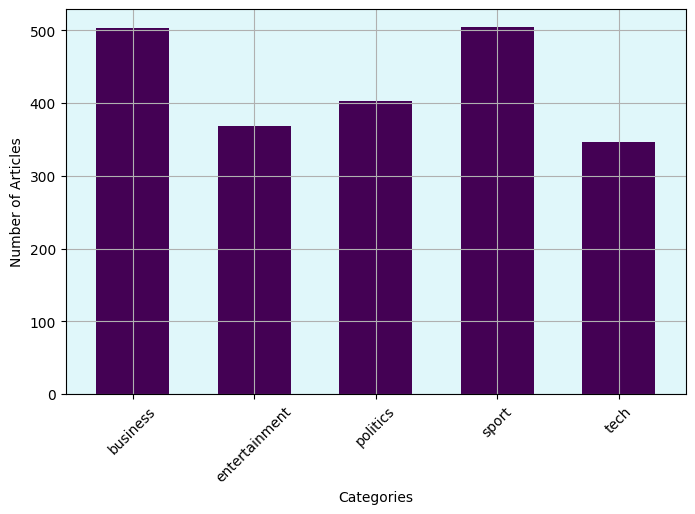

In [25]:
# Plotting a bar graph to represent all categories and number of articles in them
ax = df.plot(x="Category", kind="bar",
             figsize=(8,5), grid=True,
             xlabel="Categories",
             ylabel="Number of Articles",
             colormap="viridis", width=0.6,
             rot=45)

# Change the face color of the plot
ax.patch.set_facecolor('#e0f7fa')  # Set to light cyan color (you can change this to any color you prefer)

plt.show()

We can see that **Business** and **Sports** category have the highest number of articles, while for **Tech** category the number is quite low. Number of articles will play a major role in determining the topics in them. Larger the number of articles for a category, higher will be the result satisfaction for the model.  

## **Reindexing the Data**
Reindexing the data and extracting just the contents of the article i.e, the complete transcript of the article.

In [26]:
# Reindexing the data
reindexed_data = bbc.reset_index()

# Extracting contents of all articles
reindexed_data = reindexed_data["Contents"]

# Display
reindexed_data

0       uk economy facing 'major risks'  the uk manufa...
1       ask jeeves tips online ad revival  ask jeeves ...
2       us interest rate rise expected  us interest ra...
3       bmw to recall faulty diesel cars  bmw is to re...
4       go-ahead for balkan oil pipeline  albania, bul...
                              ...                        
2121    ea to take on film and tv giants  video game g...
2122    robots learn 'robotiquette' rules  robots are ...
2123    ibm frees 500 software patents  computer giant...
2124    ultra fast wi-fi nears completion  ultra high ...
2125    'blog' picked as word of the year  the term "b...
Name: Contents, Length: 2126, dtype: object

As we can see the above dataset has got the complete set of articles, now we can use this dataset to count the top words with highest frequencies

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Tokenization
</div>

We tokenize words and clean-up text.

The sentences look better now, but we want to tokenize each sentence into a list of words, removing punctuations and unneccessary characters altogether.

Gensim's `simple_preprocess()` is great for this. Additionally I have set `deacc=True` to remove the punctuations.

In [27]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(reindexed_data))
print(data_words[:1])

[['uk', 'economy', 'facing', 'major', 'risks', 'the', 'uk', 'manufacturing', 'sector', 'will', 'continue', 'to', 'face', 'serious', 'challenges', 'over', 'the', 'next', 'two', 'years', 'the', 'british', 'chamber', 'of', 'commerce', 'bcc', 'has', 'said', 'the', 'group', 'quarterly', 'survey', 'of', 'companies', 'found', 'exports', 'had', 'picked', 'up', 'in', 'the', 'last', 'three', 'months', 'of', 'to', 'their', 'best', 'levels', 'in', 'eight', 'years', 'the', 'rise', 'came', 'despite', 'exchange', 'rates', 'being', 'cited', 'as', 'major', 'concern', 'however', 'the', 'bcc', 'found', 'the', 'whole', 'uk', 'economy', 'still', 'faced', 'major', 'risks', 'and', 'warned', 'that', 'growth', 'is', 'set', 'to', 'slow', 'it', 'recently', 'forecast', 'economic', 'growth', 'will', 'slow', 'from', 'more', 'than', 'in', 'to', 'little', 'below', 'in', 'both', 'and', 'manufacturers', 'domestic', 'sales', 'growth', 'fell', 'back', 'slightly', 'in', 'the', 'quarter', 'the', 'survey', 'of', 'firms', 'f

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Create Bigram and Trigram Models
</div>

Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

Some examples in our example are: 'front bumper', 'oil leak', 'maryland college park' etc.

Gensim's `Phrases` model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to `Phrases` are `min_count` and `threshold`. The higher the values of these param, the harder it is for words to be combined to bigrams.

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Create Bigram and Trigram Models
</div>

In [28]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['uk', 'economy', 'facing', 'major', 'risks', 'the', 'uk', 'manufacturing_sector', 'will', 'continue', 'to', 'face', 'serious', 'challenges', 'over', 'the', 'next', 'two', 'years', 'the', 'british', 'chamber', 'of', 'commerce', 'bcc', 'has', 'said', 'the', 'group', 'quarterly', 'survey', 'of', 'companies', 'found', 'exports', 'had', 'picked_up', 'in', 'the', 'last', 'three', 'months', 'of', 'to', 'their', 'best', 'levels', 'in', 'eight', 'years', 'the', 'rise', 'came', 'despite', 'exchange_rates', 'being', 'cited', 'as', 'major', 'concern', 'however', 'the', 'bcc', 'found', 'the', 'whole', 'uk', 'economy', 'still', 'faced', 'major', 'risks', 'and', 'warned', 'that', 'growth', 'is', 'set', 'to', 'slow', 'it', 'recently', 'forecast', 'economic_growth', 'will', 'slow', 'from', 'more', 'than', 'in', 'to', 'little', 'below', 'in', 'both', 'and', 'manufacturers', 'domestic', 'sales', 'growth', 'fell', 'back', 'slightly', 'in', 'the', 'quarter', 'the', 'survey', 'of', 'firms', 'found', 'emplo


<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Remove Stopwords, Make Bigrams and Lemmatize
</div>

Bigrams model is ready. Let's define the functions to remove the stopwords, make bigrams and lemmatization and call them sequentially.

In [29]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [30]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['economy', 'face', 'major', 'risk', 'manufacturing_sector', 'continue', 'face', 'serious', 'challenge', 'year', 'say', 'group', 'quarterly', 'survey', 'company', 'find', 'export', 'pick', 'last', 'month', 'good', 'level', 'year', 'rise', 'come', 'exchange', 'rate', 'cite', 'major', 'concern', 'however', 'find', 'whole', 'economy', 'still', 'face', 'major', 'risk', 'warn', 'growth', 'set', 'slow', 'recently', 'forecast', 'economic_growth', 'slow', 'little', 'manufacturer', 'domestic', 'sale', 'growth', 'fall', 'back', 'slightly', 'quarter', 'survey', 'firm', 'find', 'employment', 'manufacturing', 'also', 'fall', 'job', 'year', 'positive', 'news', 'export', 'sector', 'worrying', 'sign', 'manufacture', 'bcc', 'say', 'result', 'reinforce', 'concern', 'sector', 'persistent', 'inability', 'sustain', 'recovery', 'outlook', 'service', 'sector', 'uncertain', 'increase', 'export', 'order', 'quarter', 'note', 'find', 'confidence', 'increase', 'quarter', 'manufacturing', 'service', 'sector', 'ov

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Create the Dictionary and Corpus needed for Topic Modeling
</div>

The two main inputs to the LDA topic model are the dictionary(`id2word`) and the corpus. Let's create them

In [31]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 4), (21, 3), (22, 1), (23, 3), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 4), (36, 2), (37, 1), (38, 1), (39, 1), (40, 2), (41, 2), (42, 1), (43, 3), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 3), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 2), (77, 1), (78, 4), (79, 4), (80, 2), (81, 2), (82, 2), (83, 2), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 4)]]


In [32]:
id2word[0]

'also'

In [33]:
corpus[:1][0][:10]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 2),
 (9, 1)]

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Term Frequency Vectorization
</div>

In [34]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('also', 1),
  ('back', 1),
  ('bcc', 1),
  ('challenge', 1),
  ('cite', 1),
  ('come', 1),
  ('company', 1),
  ('concern', 2),
  ('confidence', 2),
  ('consumer_confidence', 1),
  ('consumer_spende', 1),
  ('continue', 1),
  ('contribute', 1),
  ('cost', 1),
  ('decelerate', 1),
  ('domestic', 1),
  ('economic_growth', 1),
  ('economy', 2),
  ('employment', 1),
  ('exchange', 1),
  ('export', 4),
  ('face', 3),
  ('fail', 1),
  ('fall', 3),
  ('find', 4),
  ('firm', 1),
  ('forecast', 1),
  ('good', 1),
  ('group', 1),
  ('growth', 2),
  ('higher_taxe', 1),
  ('hold', 1),
  ('however', 1),
  ('improved', 1),
  ('inability', 1),
  ('increase', 4),
  ('interest_rate', 2),
  ('investment', 1),
  ('job', 1),
  ('keep', 1),
  ('last', 2),
  ('level', 2),
  ('little', 1),
  ('major', 3),
  ('manufacture', 1),
  ('manufacturer', 1),
  ('manufacturing', 2),
  ('manufacturing_sector', 1),
  ('margin', 1),
  ('month', 2),
  ('news', 1),
  ('next', 1),
  ('note', 1),
  ('order', 1),
  ('outloo

### **Frequency of Words**

In [35]:
# Calculate word frequencies
from collections import defaultdict # Import defaultdict
word_freq = defaultdict(int)
for doc in corpus:
    for word_id, freq in doc:
        word_freq[id2word[word_id]] += freq

# Convert to DataFrame for easier manipulation
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
word_freq_df


,word,frequency
0,also,2035
1,back,759
2,bcc,1
3,challenge,199
4,cite,25
...,...,...
17504,zdnet,1
17505,hitwise,1
17506,hyperlink,1
17507,repressive,1


### **Plot of Word Frequencies**

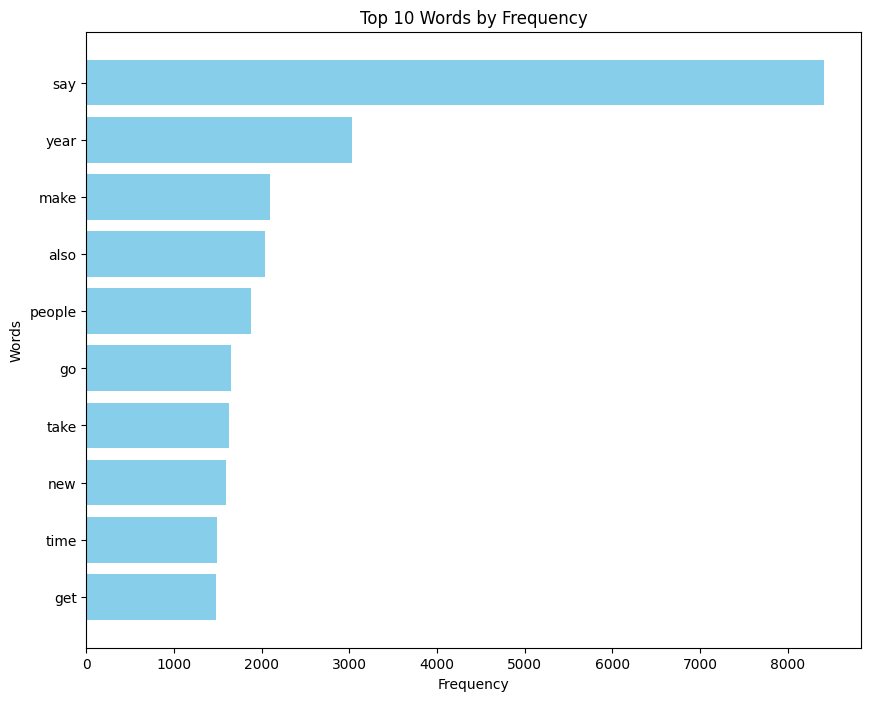

In [36]:
# Sort by frequency and get the top 10 words
top_10_words = word_freq_df.sort_values(by='frequency', ascending=False).head(10)

plt.figure(figsize=(10, 8))
plt.barh(top_10_words['word'], top_10_words['frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Words by Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>TF-IDF Vectorization
</div>

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialising the tfidf vectorizer with the default stopword list
tfidf = TfidfVectorizer(stop_words="english", max_features= 1000, max_df = 0.5, smooth_idf=True)

In [38]:
# Join the lemmatized tokens back into strings (documents)
data_lemmatized_strings = [' '.join(tokens) for tokens in data_lemmatized]

# Vectorizing 'X' column using the list of strings
vector = tfidf.fit_transform(data_lemmatized_strings)

# Converting vector into an array
X = vector.toarray()
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.055267,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.084561,0.0,0.0,0.0000,0.000000,...,0.000000,0.066283,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.0,0.038906,0.0,0.0,0.0,0.000000,0.0,0.0,0.0503,0.000000,...,0.000000,0.055928,0.000000,0.084398,0.000000,0.0,0.0,0.000000,0.0,0.0
2122,0.0,0.000000,0.0,0.0,0.0,0.044308,0.0,0.0,0.0000,0.000000,...,0.000000,0.034731,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2123,0.0,0.026654,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.019273,0.036712,0.0,0.0,0.028368,0.0,0.0
2124,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,...,0.000000,0.041049,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Building the Topic Model
</div>

Now that all the necessary preprocessing is done, we'll implement the ML model for topic modeling on the BBC news articles. Here we have used the LDA algorithm for the purpose. Let’s discuss more about the algorithm and its specifics.

We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.

Apart from that, `alpha` and `eta` are hyperparameters that affect sparsity of the topics. According to the gensim docs, both defaults to 1.0/num_topics prior.
`chunksize` is the number of documents to be used in each training chunk.  `update_every` determines how often the model parameters should be updated and `passes` is the total number of training passes.

## **Build LDA Model**

In [39]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## **View the Topics in LDA model**

In [40]:
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"game" + 0.015*"play" + 0.012*"year" + 0.010*"good" + 0.010*"say" + '
  '0.009*"go" + 0.009*"first" + 0.009*"time" + 0.009*"player" + 0.009*"get"'),
 (1,
  '0.022*"say" + 0.013*"people" + 0.010*"technology" + 0.009*"use" + '
  '0.008*"new" + 0.007*"user" + 0.007*"make" + 0.007*"also" + 0.006*"service" '
  '+ 0.006*"computer"'),
 (2,
  '0.018*"say" + 0.014*"player" + 0.011*"club" + 0.008*"year" + 0.007*"wale" + '
  '0.006*"vehicle" + 0.006*"uwb" + 0.006*"last" + 0.006*"display" + '
  '0.006*"want"'),
 (3,
  '0.035*"say" + 0.006*"file" + 0.006*"patent" + 0.005*"make" + 0.005*"law" + '
  '0.005*"campaign" + 0.004*"take" + 0.004*"rule" + 0.004*"claim" + '
  '0.004*"attack"'),
 (4,
  '0.015*"minute" + 0.015*"half" + 0.013*"penalty" + 0.012*"ball" + '
  '0.009*"try" + 0.007*"rise" + 0.006*"goal" + 0.006*"lift" + 0.005*"yard" + '
  '0.005*"economy"')]


### ***How to interpret this?***

Topic 0 is a represented as '0.028*"say" + 0.012*"legal" + 0.012*"law" + 0.012*"patent" + 0.012*"file" + '
  '0.010*"case" + 0.008*"court" + 0.007*"company" + 0.007*"claim" + '
  '0.007*"protect"'


It means the top 10 keywords that contribute to this topic are: 'say', 'legal', 'law', 'patent', 'file'... and so on and the weight of 'say' on topic 0 is 0.028.

The weights reflect how important a keyword is to that topic.

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Compute Model Perplexity and Coherence Score
</div>

Model perplexity and [topic coherence](https://rare-technologies.com/what-is-topic-coherence/) provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Compute Model Perplexity and Coherence Score
</div>


In [41]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -8.039868216732598


In [42]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4155480126620351


In [43]:
# hyperparameter tuning using Grid Search CV
grid_params = {'n_components' : [5]}

# creating LDA model object
lda = LatentDirichletAllocation()

# fitting the model
topic_lda_model = GridSearchCV(lda, param_grid = grid_params)
topic_lda_model.fit(X)

# best LDA model
best_lda_model = topic_lda_model.best_estimator_
print("Best LDA model's params" , topic_lda_model.best_params_)
print("Best log likelihood Score for the LDA model",topic_lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(X))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -23785.81858543543
LDA model Perplexity on train data 1503.5478716271289


<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Visualize the Topics-keywords
</div>

Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. There is no better tool than pyLDAvis package’s interactive chart and is designed to work well with jupyter notebooks.

In [ ]:
!pip uninstall psutil -y
!pip install psutil

Found existing installation: psutil 5.8.0
Uninstalling psutil-5.8.0:
  Successfully uninstalled psutil-5.8.0
  Using cached psutil-6.0.0-cp37-abi3-win_amd64.whl.metadata (22 kB)
Using cached psutil-6.0.0-cp37-abi3-win_amd64.whl (257 kB)



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install joblib
!pip install pyLDAvis
!pip install gensim


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.0
    Uninstalling joblib-1.0.0:
      Successfully uninstalled joblib-1.0.0



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Visualize the Topics-keywords
</div>

In [44]:
# Visualize the topics
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.169014 -0.080367       1        1  33.272429
0     -0.050207 -0.147479       2        1  26.914614
3     -0.101228  0.235436       3        1  24.308193
2      0.020061 -0.018282       4        1  12.199139
4      0.300388  0.010692       5        1   3.305624, topic_info=            Term         Freq        Total Category  logprob  loglift
3121        game  3158.000000  3158.000000  Default  30.0000  30.0000
136       player  1386.000000  1386.000000  Default  29.0000  29.0000
1316        play  1495.000000  1495.000000  Default  28.0000  28.0000
78           say  7263.000000  7263.000000  Default  27.0000  27.0000
915   technology  1134.000000  1134.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
792        point    50.222382   432.092475   Topic5  -5.4356   1.2574
1484        send    47.064833   435.933157   Topic5  -5.5005   1.1836
903        drive    36.679021   222.998714   Topic5  -5.7499   1.6046
1           back    37.974226   797.006753   Topic5  -5.7152   0.3656
102         year    34.490640  2361.720439   Topic5  -5.8114  -0.8169

[341 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
693       1  0.986229       access
693       3  0.011380       access
1740      4  0.979863  acquisition
408       2  0.234126       action
408       3  0.764811       action
...     ...       ...          ...
102       1  0.289619         year
102       2  0.493708         year
102       3  0.065207         year
102       4  0.136341         year
102       5  0.014396         year

[561 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5])

From the above graph we can see the top 30 term for each topic/category in our dataset. This represents the set of words most relevant to each category. Each term in here is extracted from a respective article set and based on their relevancy they're sorted out. Top 30 terms resembles keywords that were encountered the most throughout that category.

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Creating Document Terms Data Frame
</div>

In [45]:
# creating docterms dataframe
docterms = vis.token_table.sort_values(by = ['Freq'], ascending=False)

### **Display Terms Data Frame**

In [47]:
# display docterms df
docterms

,Topic,Freq,Term
term,,,
915,1,0.999453,technology
1342,3,0.999053,patent
378,3,0.998993,law
2777,2,0.998920,title
2452,1,0.998919,user
...,...,...,...
459,4,0.007449,use
874,4,0.006618,issue
40,5,0.005639,last


<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Create Topics Dataframe
</div>

In [48]:
# create topics dataframe
topicsdf = pd.DataFrame()

In [49]:
# adding top 50 most relevant terms for each topic to the dataframe
topics_list = [] # Create a list to hold topic dictionaries
for i in range(1,6):
  Topicdict ={ "Topic":i, "Terms":list(docterms[docterms['Topic']==i]['Term'].head(10))  }
  topics_list.append(Topicdict) # Append to list

# Create the DataFrame outside the loop
topicsdf = pd.DataFrame(topics_list)
topicsdf

,Topic,Terms
0,1,"[technology, user, computer, blog, pc, datum, ..."
1,2,"[title, film, score, robot, award, star, round..."
2,3,"[patent, law, court, case, hear, rule, file, c..."
3,4,"[club, display, uwb, vehicle, celtic, football..."
4,5,"[header, shane_william, gara, conversion, reve..."


### **Topic 1: Tech**

In [50]:
# creating term freq dict for topic 1
t1dict = {}
for vals in docterms[docterms['Topic']==1].head(40).values:
  t1dict[vals[2]] =vals[1]
t1dict

{'technology': 0.9994527168074874,
 'user': 0.9989187864819623,
 'computer': 0.9988225690177246,
 'blog': 0.9986117645919671,
 'pc': 0.9984929002627744,
 'datum': 0.998381983361104,
 'software': 0.9982837478828075,
 'network': 0.9980666919952544,
 'mobile': 0.9979518157736652,
 'broadband': 0.9979047432234939,
 'phone': 0.9978148230376154,
 'device': 0.9975080609844452,
 'web': 0.9974553318980436,
 'customer': 0.9974373868940213,
 'cell': 0.997162457828733,
 'apple': 0.9971545855525933,
 'digital': 0.9971378659462221,
 'online': 0.9971076509643788,
 'download': 0.9967742117170725,
 'cable': 0.9965577605231031,
 'consumer': 0.9960598185642489,
 'gadget': 0.9960027034080164,
 'console': 0.9952874838098056,
 'machine': 0.9950537563518757,
 'operator': 0.9949194017625893,
 'labour': 0.9943067853961715,
 'mobile_phone': 0.9934936238370549,
 'election': 0.9934348452442368,
 'developer': 0.9931422463219427,
 'store': 0.9931152810793827,
 'access': 0.9862286495976867,
 'image': 0.9837831850504

In [51]:
# Generating the Wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='beige',
                min_font_size = 10).generate(' '.join(list(t1dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t1dict)

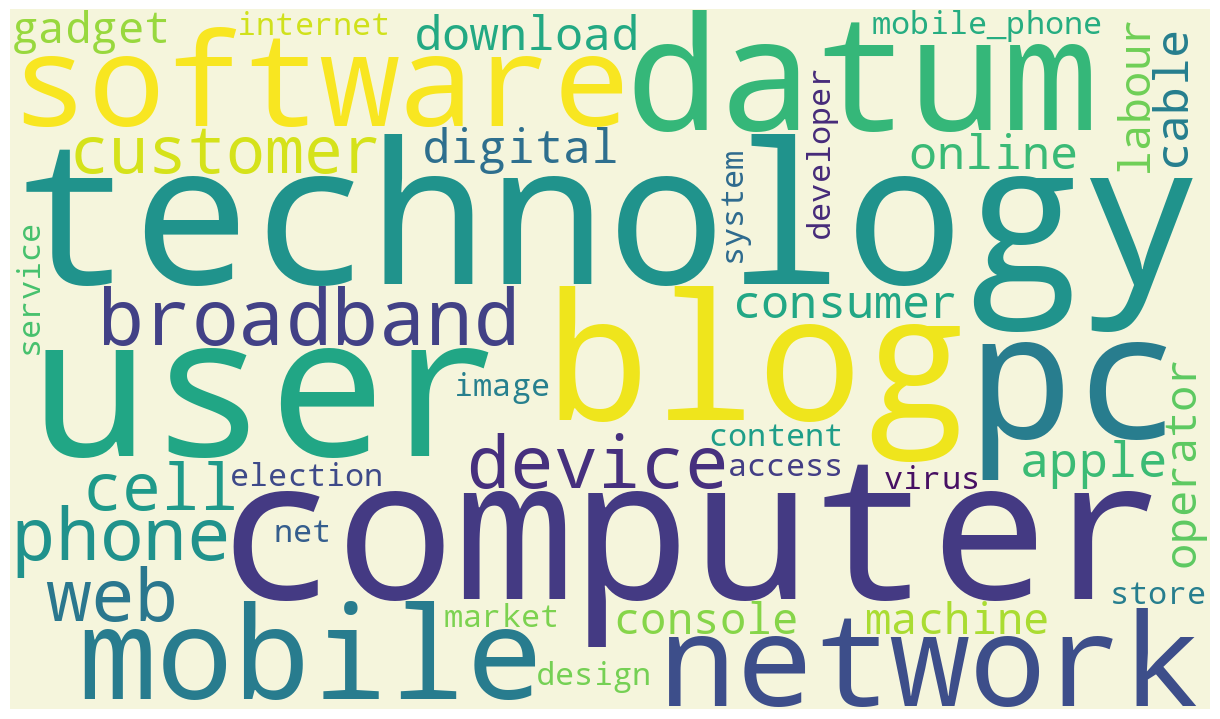

In [52]:
# plotting the WordCloud image
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### **Topic 2: Business**



In [53]:
#creating term freq dict for topic 2
t2dict = {}
for vals in docterms[docterms['Topic']==2].head(40).values:
  t2dict[vals[2]] =vals[1]
t2dict

{'title': 0.9989200943667212,
 'film': 0.9985801009071147,
 'score': 0.9973920674079682,
 'robot': 0.9968954285668278,
 'award': 0.9968841376109714,
 'star': 0.996141836176994,
 'round': 0.995797480312813,
 'dvd': 0.9957857038527066,
 'season': 0.995728222308736,
 'beat': 0.9949055805728435,
 'seed': 0.9946187718045614,
 'studio': 0.9944555099119132,
 'cinema': 0.9940759978537881,
 'champion': 0.9938834117551453,
 'athlete': 0.9928908255294101,
 'dvds': 0.992391210614707,
 'artist': 0.9919791970384731,
 'winner': 0.9915246254226763,
 'tour': 0.9913459873261451,
 'chart': 0.9911129504908004,
 'game': 0.9908019167214468,
 'favourite': 0.9903020697629489,
 'tournament': 0.9902420598483931,
 'visitor': 0.9902035386787258,
 'championship': 0.9899904489224768,
 'roddick': 0.9896771537720472,
 'squad': 0.989020244915853,
 'blue': 0.9871691447837277,
 'prize': 0.9856903669240785,
 'captain': 0.98347855609695,
 'broadcaster': 0.9820566344834547,
 'finish': 0.9715768340970243,
 'career': 0.96488

In [54]:
# generating the wordcloud for topic 2
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='black',
                min_font_size = 10).generate(' '.join(list(t2dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t2dict)


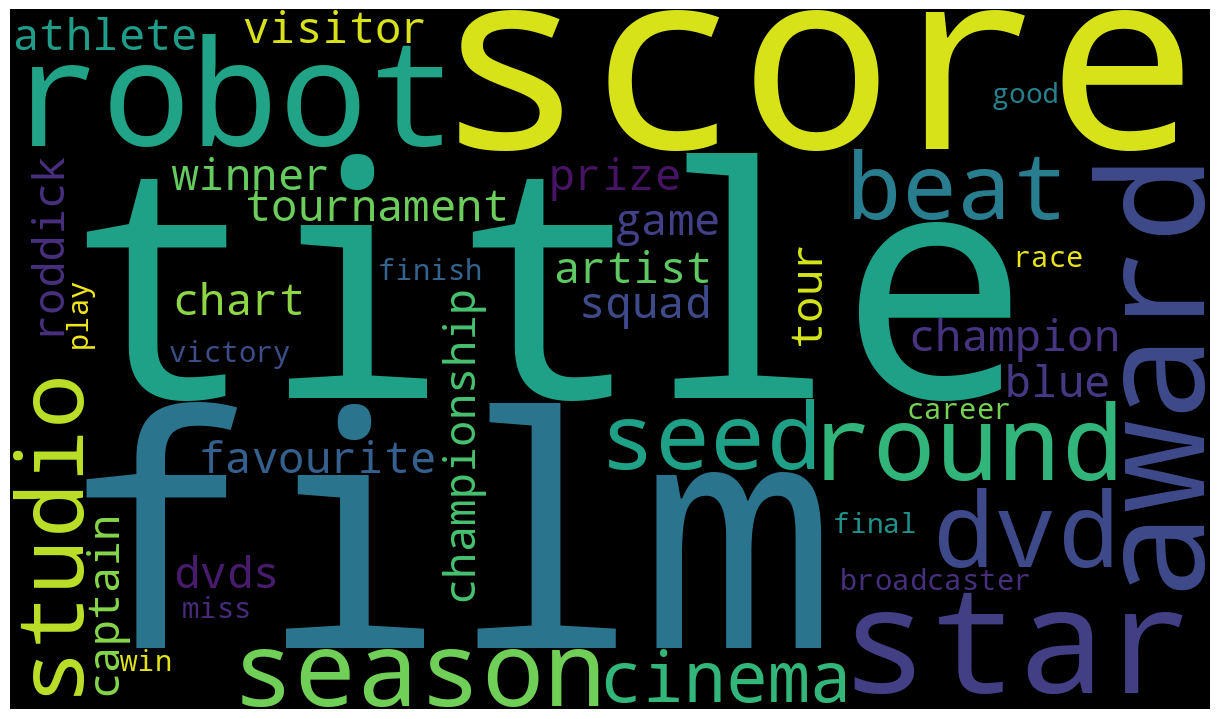

In [55]:
# plotting the WordCloud image
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### **Topic 3: Sports**

In [56]:
# creating term freq dict for topic 3
t3dict = {}
for vals in docterms[docterms['Topic']==3].head(40).values:
  t3dict[vals[2]] =vals[1]
t3dict

{'patent': 0.999052502572106,
 'law': 0.998993291215314,
 'court': 0.9982645528578938,
 'case': 0.9982026012591695,
 'hear': 0.9980050279441113,
 'rule': 0.9974238651842726,
 'file': 0.9973940325163768,
 'code': 0.9968416850847731,
 'peer': 0.99671709617658,
 'trial': 0.9966308027089537,
 'classroom': 0.9963841472775427,
 'criminal': 0.9961344284373215,
 'language': 0.9960138251356682,
 'study': 0.9959500378145272,
 'traffic': 0.9959309609565786,
 'ban': 0.9956526664275667,
 'lawsuit': 0.9956243383663899,
 'legal': 0.995617572839142,
 'student': 0.9954741452683483,
 'adult': 0.9947133216921236,
 'legal_action': 0.9938668118867693,
 'parent': 0.9938648312678371,
 'illegal': 0.9934321872770293,
 'document': 0.9932900529601328,
 'telephone': 0.9929531158356634,
 'spammer': 0.9927582246607418,
 'deny': 0.992601149581535,
 'pirate': 0.9923715569514725,
 'behaviour': 0.9922633952368817,
 'police': 0.9921325047755426,
 'copyright': 0.9910585186023184,
 'campaign': 0.9778932254998917,
 'charge

In [57]:
# generating the Wordcloud for topic 3
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='magenta',
                min_font_size = 10).generate(' '.join(list(t3dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t3dict)


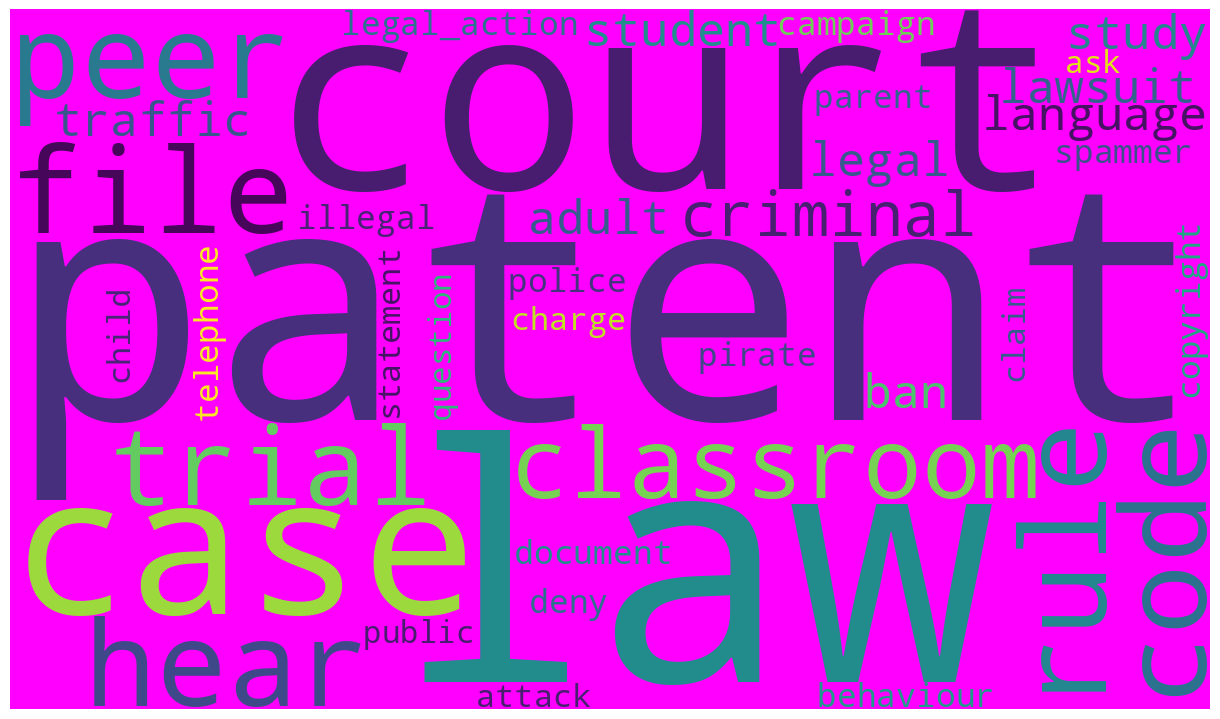

In [58]:
# plotting the WordCloud image
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### **Topic 4: Politics**

In [59]:
# creating term freq dict for topic 4
t4dict = {}
for vals in docterms[docterms['Topic']==4].head(40).values:
  t4dict[vals[2]] =vals[1]
t4dict

{'club': 0.9983056939014633,
 'display': 0.9978536750733219,
 'uwb': 0.996637734523933,
 'vehicle': 0.9964305560651714,
 'celtic': 0.9945892393041509,
 'football': 0.9942457269549865,
 'tie': 0.9941623244940256,
 'chelsea': 0.9932453787602957,
 'initially': 0.9931836209198358,
 'newcastle': 0.9930664056601498,
 'premiership': 0.9930337485477615,
 'referee': 0.9911719507125812,
 'liverpool': 0.9911703049790791,
 'welsh': 0.9908922289539567,
 'sun': 0.9901729971990673,
 'mourinho': 0.9899244591627666,
 'pitch': 0.9884071757212956,
 'friendly': 0.9883548996047722,
 'davy': 0.9877366556044045,
 'champions_league': 0.9868683884712343,
 'manchester_unite': 0.9864353500984184,
 'ranger': 0.9859645441891263,
 'dominance': 0.9853278427276577,
 'rumour': 0.9844169836730918,
 'barcelona': 0.983722545494977,
 'prefer': 0.9833029857834193,
 'ultra': 0.9814058636443536,
 'acquisition': 0.9798630629770838,
 'real_madrid': 0.9784725711623194,
 'stake': 0.9767811444833461,
 'engine': 0.9693529782352436

In [60]:
# generating the wordcloud for topic 4
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='cyan',
                min_font_size = 10).generate(' '.join(list(t4dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t4dict)


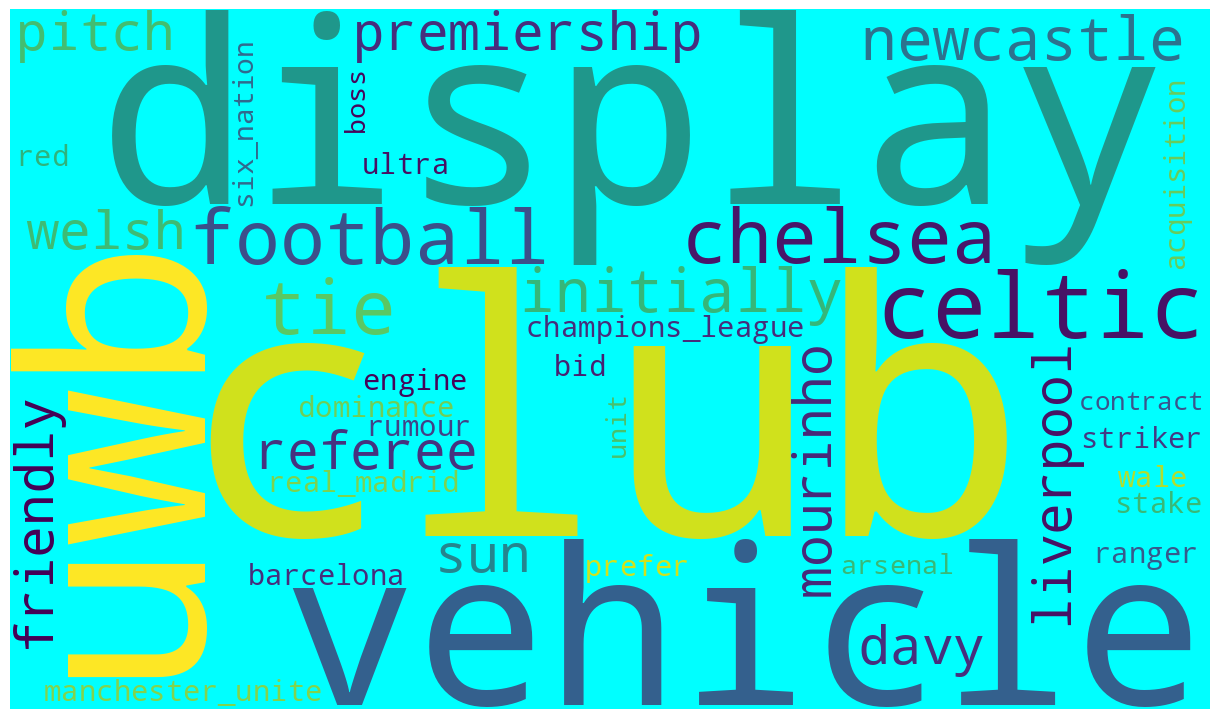

In [61]:
# plotting the WordCloud image
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### **Topic 5: Entertainment**

In [62]:
# creating term freq dict for topic 5
t5dict = {}
for vals in docterms[docterms['Topic']==5].head(40).values:
  t5dict[vals[2]] =vals[1]
t5dict

{'header': 0.9839177000996454,
 'shane_william': 0.9790736668149511,
 'gara': 0.9789710724517281,
 'conversion': 0.9760511282377909,
 'reverse': 0.9741914806026545,
 'free_kick': 0.9733417635674011,
 'glorious': 0.973111859052007,
 'desailly': 0.9730994371195549,
 'argentina': 0.9726070144365119,
 'henson': 0.97247205050778,
 'interest_rate': 0.9724685337294585,
 'bounce': 0.9673441176592138,
 'upright': 0.9667397561215407,
 'de_marigny': 0.9646630570188565,
 'martyn': 0.9634640013551323,
 'deficit': 0.9628135326140097,
 'dyer': 0.9616799793703721,
 'gudjohnsen': 0.9607241376893719,
 'toure': 0.957684640233072,
 'petr_cech': 0.9558571427835122,
 'driscoll': 0.9544964441594324,
 'inflation': 0.9508307714290547,
 'seychelle': 0.9469580930419788,
 'economist': 0.9448879522396767,
 'horgan': 0.9432160900886364,
 'currency': 0.9414310646516497,
 'sheet': 0.937582952362236,
 'leamy': 0.9324419279520993,
 'yard': 0.9290404216918084,
 'touchline': 0.925743525283398,
 'turnover': 0.907842417617

In [63]:
# generating the wordcloud for topic 5
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='maroon',
                min_font_size = 10).generate(' '.join(list(t5dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t5dict)


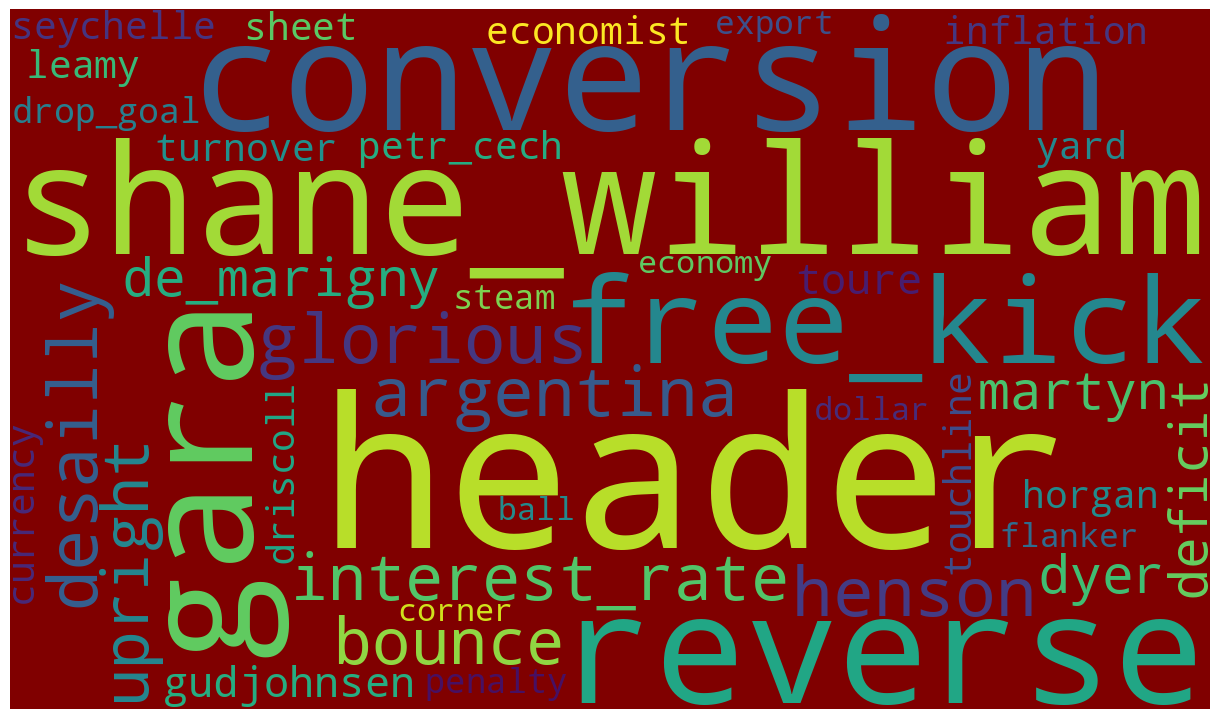

In [64]:
# plotting the WordCloud image
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

<div class="alert alert-info" style="background-color:#0000FF; color:white; padding:0px 10px; border-radius:5px;">
    <h2 style='margin:10px 5px'>Conclusions
</div>

1. While reading the text files, we noticed that the file encoding was different in a few off-cases. We found that considering such factors, and engineering based on such knowledge, is very important while handling such data, in order to do so efficiently.

2. Upon experimenting with stemming and lemmatization on our dataset, we found that although it saves space and perhaps time, in our case, it's better to focus on quality, and avoid nuances. In our own 'cost-benefit' analysis, the difference weren't all that significant. Perhaps at a massive scale, the former approach would be ideal.

3. We noticed that it's more optimal to tokenize with no factual differences.
so we lowercased the contents to unify tokens that may have just case-differences.

4. These are the optimal lda metrics that we got after implementing GridSearchCV:

  Best LDA model's params {'n_components': 5}

  Best log likelihood Score for the LDA model -643494.9704171557

  LDA model Perplexity on train data 1696.6352006244963

5. Upon looking at the top n topics generated, we were able to correlate it with relevance to what was expected at a significant degree, whilst also shedding light on some unseen aspects.. Hence, we see that the model effectively beared fruit.